<a href="https://colab.research.google.com/github/Arman001/fraud-deteciton-ml/blob/main/Fraud_Detection_and_Machine_Learning_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fraud Detection with Machine Learning**
***
### **By:** Muhammad Saad
***
- Only cpu based model training is used here.
- Two Models are used as training takes some time.

## Import Libraries

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
import time

import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize


## Load the dataset


In [21]:
# You can download the dataset from this link https://drive.google.com/file/d/1dCgctWx97hi68Hvsp9MYr_UxcMBYO5PO/view?usp=drive_link
# Upload it in the files section

dataset = pd.read_csv('creditcard_2023.csv')

In [22]:
dataset.shape

(568630, 31)

In [23]:
dataset.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [24]:
dataset.columns
# The Columns through V1 to V28 are anonymized to protect the cardholders' identities.

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Data Preprocessing

### Data Cleaning

In [25]:
# checking for missing values
missing_values = dataset.isnull().sum()
missing_values

,0
id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


 There are no null values here this is good news

### Feature Engineering

We don't need this step here

### Checking for Dataset Balance

In [26]:
# Let's check how much transactions are fraudlent and how much are genuine
transaction_counts = dataset['Class'].value_counts()

transaction_counts


,count
Class,
0,284315
1,284315


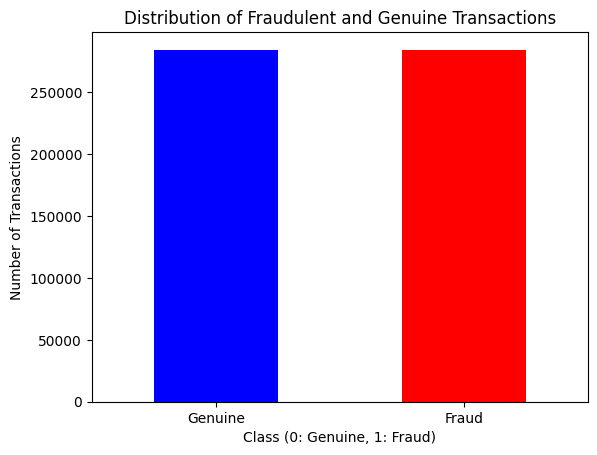

In [27]:
# Plot the distribution of the 'Class' column
dataset['Class'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Fraudulent and Genuine Transactions')
plt.xlabel('Class (0: Genuine, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=[0, 1], labels=['Genuine', 'Fraud'], rotation=0)
plt.show()

It is a perfectly balanced dataset we can move further

### Feature Scaling

In [28]:
# Other values are scaled perfectly we can scale amount column for models like SVM
scaler = StandardScaler()
dataset['Amount'] = scaler.fit_transform(dataset[['Amount']])


In [29]:
dataset.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285,0


### Splitting into Train and Test Datasets

In [30]:
X = dataset.drop(columns=['id','Class'])  # All columns except the target column and id column
y = dataset['Class']  # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Stroing testing dataset so it can be used for making predicitons with stored model
X_test.to_pickle("X_test.pkl")
y_test.to_pickle("y_test.pkl")

#Shorter version
(X_test.head(10)).to_pickle('X_test_shorter.pkl')
(y_test.head(10)).to_pickle('y_test_shorter.pkl')


In [31]:
print ('X_train shape', X_train.shape)
print ('X_test shape', X_test.shape)
print ('y_train shape', y_train.shape)
print ('y_test shape', y_test.shape)


X_train shape (454904, 29)
X_test shape (113726, 29)
y_train shape (454904,)
y_test shape (113726,)


## Training Different Models


### 1. Logistic Regression

#### Training The Model

In [32]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [33]:
start_time = time.time()
lr_model.fit(X_train, y_train)
end_time = time.time()

training_time_lr = end_time - start_time
print(f"Training time Logistic Regressopm: {training_time_lr:.2f} seconds")

Training time Logistic Regressopm: 2.48 seconds


#### Making Predictions

In [34]:
# Predict on the test set
lr_y_pred = lr_model.predict(X_test)
lr_y_pred_prob = lr_model.predict_proba(X_test)[:,1]  # Probabilities for ROC-AUC calculation

#### Evaluate the Model

#####  a.  Accuracy, Precision, Recall, and F1-Score


In [35]:
# Print evaluation metrics
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred)
lr_recall = recall_score(y_test, lr_y_pred)
lr_f1 = f1_score(y_test, lr_y_pred)

print(f'Accuracy: {lr_accuracy:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')
print(f'F1 Score: {lr_f1:.4f}')

Accuracy: 0.9649
Precision: 0.9770
Recall: 0.9523
F1 Score: 0.9645


##### b. ROC-AUC Score

In [36]:
lr_roc_auc = roc_auc_score(y_test, lr_y_pred_prob)
print(f'ROC-AUC Score: {lr_roc_auc:.4f}')

ROC-AUC Score: 0.9935


##### c. Classification Report

In [37]:
print("Classification Report:\n", classification_report(y_test, lr_y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.98      0.95      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.97      0.96      0.96    113726
weighted avg       0.97      0.96      0.96    113726



##### d. Confusion Matrix

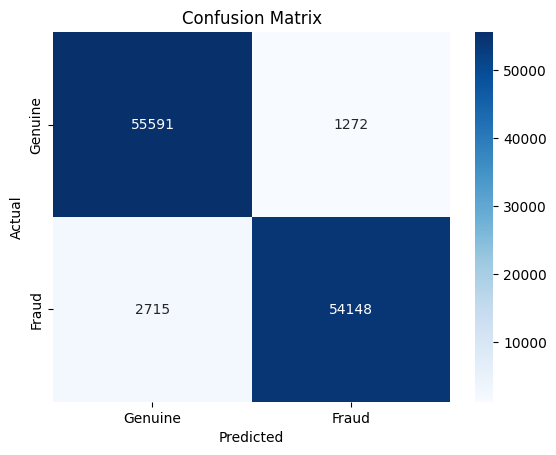

In [38]:
# Plot the confusion matrix for a better visualization
lr_cm = confusion_matrix(y_test, lr_y_pred)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Fraud'], yticklabels=['Genuine', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 2. Random Forest

#### Training The Model

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)


In [40]:
start_time = time.time()

rf_model.fit(X_train, y_train)

end_time = time.time()

training_time_rf = end_time - start_time
print(f"Training time Random Forest: {training_time_rf:.2f} seconds")

Training time Random Forest: 624.42 seconds


#### Making Predictions

In [41]:
# Predict on the test set
rf_y_pred = rf_model.predict(X_test)
rf_y_pred_prob = rf_model.predict_proba(X_test)[:,1]  # Probabilities for ROC-AUC calculation

#### Evaluate the Model

#####  a.  Accuracy, Precision, Recall, and F1-Score


In [42]:
# Print evaluation metrics
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

print(f'Accuracy: {rf_accuracy:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')
print(f'F1 Score: {rf_f1:.4f}')

Accuracy: 0.9998
Precision: 0.9996
Recall: 1.0000
F1 Score: 0.9998


##### b. ROC-AUC Score

In [43]:
rf_roc_auc = roc_auc_score(y_test, rf_y_pred_prob)
print(f'ROC-AUC Score: {rf_roc_auc:.4f}')

ROC-AUC Score: 1.0000


##### c. Classification Report

In [44]:
print("Classification Report:\n", classification_report(y_test, rf_y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



##### d. Confusion Matrix

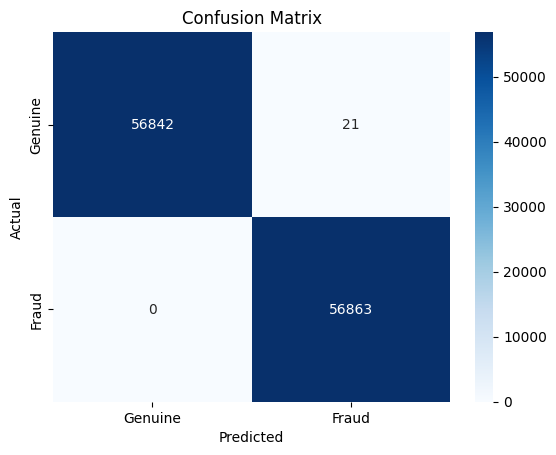

In [45]:
# Plot the confusion matrix for a better visualization
rf_cm = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Fraud'], yticklabels=['Genuine', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Comparision

### Table of Metrices

In [46]:
comparision_data = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [lr_accuracy, rf_accuracy],
    'Precision': [lr_precision, rf_precision],
    'Recall': [lr_recall, rf_recall],
    'F1-Score': [lr_f1, rf_f1],
    'ROC AUC': [lr_roc_auc, rf_roc_auc]
}

In [47]:
# Convert dictionary into a pandas DataFrame
df = pd.DataFrame(comparision_data)

In [48]:
df.set_index('Model', inplace=True)
df

,Accuracy,Precision,Recall,F1-Score,ROC AUC
Model,,,,,
Logistic Regression,0.964942,0.977048,0.952254,0.964492,0.993503
Random Forest,0.999815,0.999631,1.000000,0.999815,0.999990


### ROC Curve

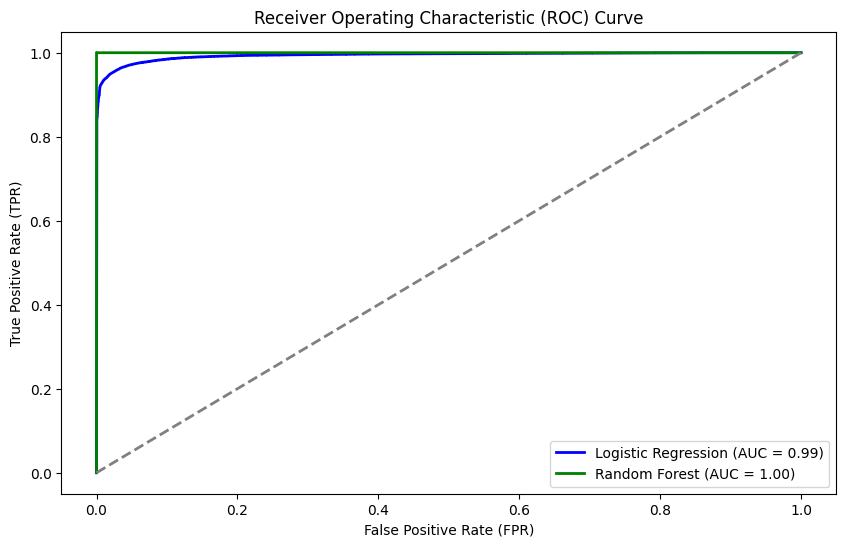

In [49]:
# Compute ROC curve and AUC
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_y_pred_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_y_pred_prob)

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rf = auc(fpr_rf, tpr_rf)


# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Plot a diagonal line (chance line)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Labels and title
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')

# Show the plot
plt.show()

### Confusion Matrices

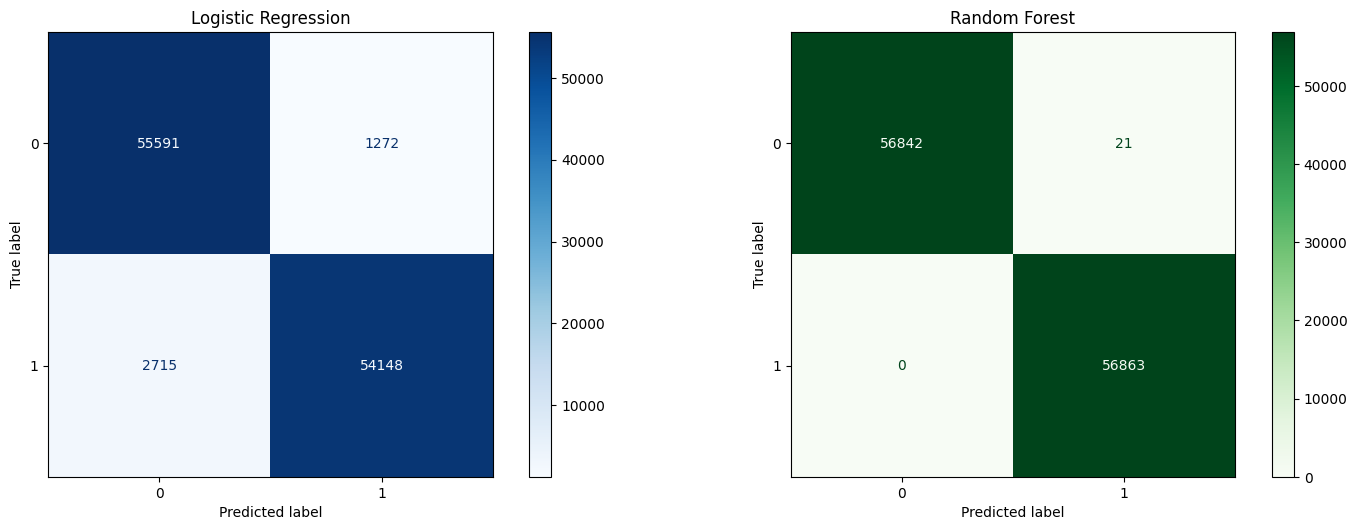

In [50]:
# Create 2x2 grid for subplots (leave the last one empty)
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot the confusion matrices
ConfusionMatrixDisplay(lr_cm).plot(ax=axs[0, 0], cmap='Blues')
axs[0, 0].set_title('Logistic Regression')

ConfusionMatrixDisplay(rf_cm).plot(ax=axs[0, 1], cmap='Greens')
axs[0, 1].set_title('Random Forest')

axs[1, 0].set_visible(False)
axs[1, 1].set_visible(False)


# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Training Time

In [51]:
training_time = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Training Time': [training_time_lr, training_time_rf],
}

df = pd.DataFrame(training_time)
df


,Model,Training Time
0,Logistic Regression,2.482587
1,Random Forest,624.418389


## Serializing Models

In [52]:
# Save models
joblib.dump(lr_model, 'lr_model.pkl')
joblib.dump(rf_model, 'rf_model.pkl')


print("Models saved successfully!")

Models saved successfully!
